In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2020, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%pylab inline

import os
from org.gesis.lib import io
from org.gesis.lib import viz
from org.gesis.lib import paper

Populating the interactive namespace from numpy and matplotlib


/ssd/lespin/virtualenv/python3.5/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
ROOT = '../../../results/'
PLOTS = os.path.join(ROOT, 'plots')
DATASETS = ['aps','blogs','seventh','hate','wikipedia']
MODELS = ["Random","SBM","DBA","DH","DBAH"]
MODEL = 'DBAH'
SMOOTH = 0.05 

<h2>Data</h2>

In [4]:
# empirical
df_node_metadata_empirical = paper.load_node_metadata(os.path.join(ROOT,'empirical'))
df_network_metadata_empirical = paper.load_network_metadata(os.path.join(ROOT,'empirical'))
df_rank_empirical = paper.load_rank(os.path.join(ROOT,'empirical'), df_network_metadata_empirical, SMOOTH)
df_network_metadata_empirical = df_network_metadata_empirical.query("dataset in @DATASETS")

# fit
df_node_metadata_fit = paper.load_node_metadata(os.path.join(ROOT,'fit'))
df_node_metadata_fit = df_node_metadata_fit.query("dataset in @DATASETS")
df_rank_fit = paper.load_rank_all_models(os.path.join(ROOT,'fit'), MODELS)
df_rank = df_rank_empirical.copy()
df_rank = df_rank.append(df_rank_fit[df_rank.columns], ignore_index=True)
df_rank = df_rank.query("dataset in @DATASETS")

# synthetic
df_rank_synthetic = paper.load_rank_synthetic(os.path.join(ROOT,'synthetic',MODEL))

<h2>Empirical networks</h2>

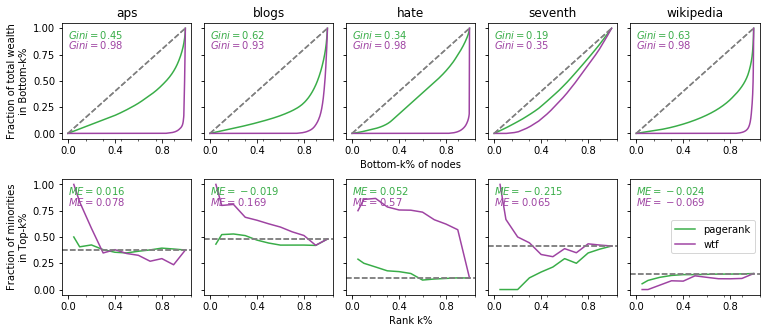

In [5]:
fn = None
viz.plot_vh_inequalities_per_dataset_and_metric(df_node_metadata_empirical, 
                                                df_rank_empirical, 
                                                df_network_metadata_empirical, fn=fn)

<h2>Fit</h2>

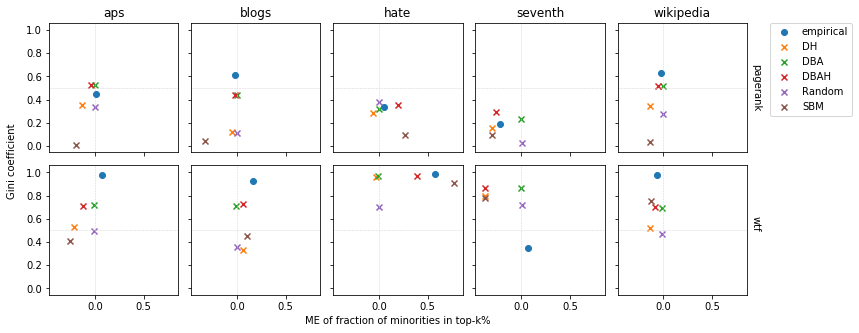

In [6]:
group = True
all = True
x = 'me'

fn = None
viz.plot_vh_inequalities_fit(df_rank, x=x, group=group, all=all, fn=fn)

<h2>Degree distributions (empirical vs. fit)</h2>

/ssd/lespin/virtualenv/python3.5/lib/python3.5/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/ssd/lespin/virtualenv/python3.5/lib/python3.5/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/ssd/lespin/virtualenv/python3.5/lib/python3.5/site-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C


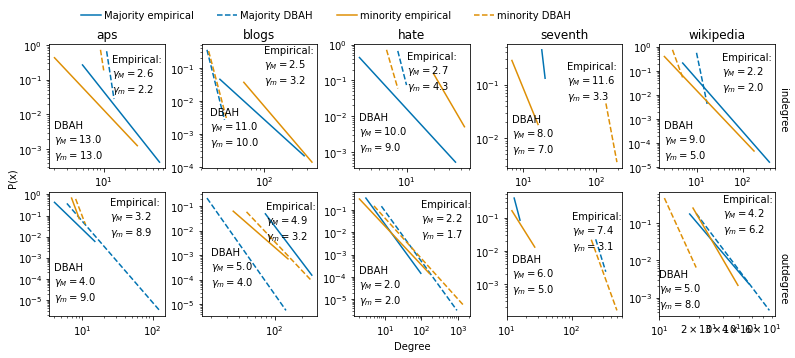

In [7]:
fn = None
viz.plot_degree_distributions_groups_fit(df_network_metadata_empirical,
                                         df_node_metadata_empirical, 
                                         df_node_metadata_fit, 
                                         model=MODEL,
                                         fn=fn)

<h2>Synthetic networks</h2>

In [8]:
sym = False
metric = 'pagerank'

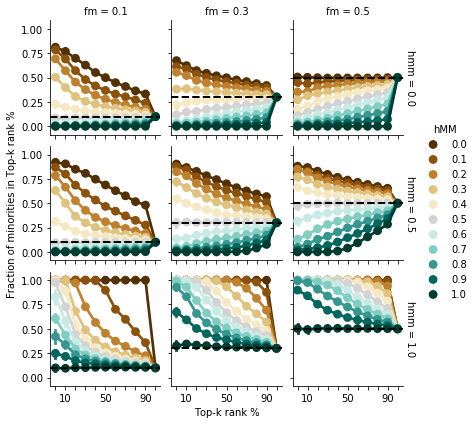

In [9]:
y = 'fmt'
fn = None
viz.plot_synthetic_rankings(df_rank_synthetic, metric=metric, y=y, sym=sym, fn=fn)

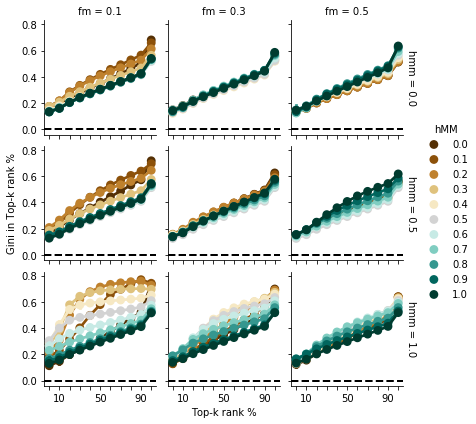

In [10]:
y = 'gt'
fn = None
viz.plot_synthetic_rankings(df_rank_synthetic, metric=metric, y=y, sym=sym, fn=fn)